<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/ccaudek/ds4psy_2023/blob/main/120_bayes_theorem.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>


(bayes_theorem_notebook)=
# Il teorema di Bayes

```{admonition} Obiettivi di apprendimento
Dopo aver completato questo capitolo, acquisirete le competenze per:

- Capire in profondità il teorema di Bayes e la sua importanza.
- Utilizzare il teorema di Bayes per analizzare e interpretare i test diagnostici, tenendo in considerazione la prevalenza della malattia in questione.
- Affrontare e risolvere problemi di probabilità discreta che necessitano dell'applicazione del teorema di Bayes.
```

In questo capitolo esploreremo il teorema di Bayes, un fondamentale risultato della teoria delle probabilità che ci permette di calcolare le probabilità a posteriori di eventi ipotetici, dati i loro valori a priori e nuove informazioni. In altre parole, ci consente di aggiornare razionalmente le nostre conoscenze alla luce di nuove evidenze. Prima di procedere con il presente capitolo, è essenziale leggere l'appendice {ref}`calculus-appendix`.

## Preparazione del Notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns

In [3]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

## Dimostrazione e Applicazioni

Supponiamo di avere una partizione dell'evento certo $\Omega$ in due soli eventi mutuamente esclusivi, che chiamiamo ipotesi $H_1$ e $H_2$. Supponiamo inoltre di conoscere le probabilità a priori $P(H_1)$ e $P(H_2)$ delle due ipotesi. Consideriamo ora un terzo evento $E$, con probabilità non nulla, di cui conosciamo le probabilità condizionate $P(E \mid H_1)$ e $P(E \mid H_2)$, ovvero la probabilità che si verifichi l'evento $E$ dati i valori delle due ipotesi. Supponendo che si sia verificato l'evento $E$, vogliamo conoscere le probabilità a posteriori delle ipotesi, ovvero $P(H_1 \mid E)$ e $P(H_2 \mid E)$.

La figura seguente rappresenta una partizione dell'evento certo in due eventi chiamati 'ipotesi' $H_1$ e $H_2$. L'evidenza $E$ è un sottoinsieme dello spazio campione.

```{image} ../images/bayes_theorem.png
:height: 230px
:align: center
```

Per trovare la probabilità dell'ipotesi 1 data l'evidenza osservata, scriviamo:

$$
P(H_1 \mid E) = \frac{P(E \cap H_1)}{P(E)}.
$$

Possiamo sostituire $P(E \cap H_1)$ con $P(E \mid H_1)P(H_1)$ data la definizione di probabilità condizionata $P(E \mid H_1) = \frac{P(E \cap H_1)}{P(H_1)}$. Così facendo l'equazione precedente diventa:

$$
P(H_1 \mid E) = \frac{P(E \mid H_1) P(H_1)}{P(E)}.
$$

Poiché $H_1$ e $H_2$ sono eventi disgiunti, la probabilità dell'evento $E$ può essere calcolata utilizzando il teorema della probabilità totale: 

$$
\begin{split}
P(E) &= P(E \cap H_1) + P(E \cap H_2)\notag\\
     &= P(E \mid H_1)P(H_1) + P(E \mid H_2)P(H_2).
\end{split}
$$

Sostituendo questi risultati nella formula di Bayes, otteniamo:

$$
P(H_1 \mid E) = \frac{P(E \mid H_1)P(H_1)}{P(E \mid H_1)P(H_1) + P(E \mid H_2)P(H_2)}.
$$ (eq-bayes1)

L'eq. {eq}`eq-bayes1` è il caso più semplice della formula di Bayes, dove ci sono solo due eventi disgiunti $H_1$ e $H_2$. Il caso generale può essere formulato nel modo seguente.

Sia $(H_i)_{i\geq 1}$ una partizione dell'evento certo $\Omega$ e sia $E \subseteq \Omega$ un evento tale che $P(E) > 0$, allora, per $i = 1, \dots, \infty$:

$$
P(H_i \mid E) = \frac{P(E \mid H_i)P(H_i)}{\sum_{j=1}^{\infty}P(H_j)P(E \mid H_j)}.
$$ (eq-bayes2)

Se $H_i$ è una variabile continua (ad esempio, il valore di un parametro in un modello statistico), allora sostituiamo la somma a donominatore con un integrale

$$
P(H_i \mid E) = \frac{P(E \mid H_i) \cdot P(H_i)}{\int P(E \mid H) \cdot P(H) \, dH},
$$ (eq-bayes-cont)

dove $P(H_i \mid E)$ è la probabilità a posteriori dell'ipotesi $H_i$ dato l'evidenza $E$, $P(E \mid H_i)$ è la verosimiglianza di $E$ dato $H_i$, $P(H_i)$ è la probabilità a priori dell'ipotesi $H_i$, e l'integrale è effettuato sull'insieme delle ipotesi $H$.

### Interpretazione

Possiamo identificare tre concetti fondamentali nell'eq. {eq}`eq-bayes2`. 

- La probabilità a priori, $P(H)$, rappresenta la misura di fiducia che attribuiamo all'ipotesi $H$ prima di avere qualsiasi informazione sull'evidenza $E$.
- La probabilità a posteriori, $P(H \mid E)$, rappresenta l'aggiornamento della probabilità a priori dopo aver ottenuto l'evidenza $E$. In altre parole, è la misura di fiducia che abbiamo nell'ipotesi $H$ dopo aver preso in considerazione l'evidenza $E$.
- La verosimiglianza di $E$ dato $H$, $P(E \mid H)$, rappresenta la probabilità dell'evidenza $E$ quando l'ipotesi $H$ è vera. È una misura di quanta "supporto" o "conferma" fornisce l'evidenza $E$ all'ipotesi $H$.

Il teorema di Bayes è uno strumento fondamentale che ci permette di aggiornare le nostre credenze in base a nuove informazioni. In pratica, ci consente di calcolare la probabilità di un'ipotesi o evento dati gli elementi di evidenza disponibili. Questo teorema è particolarmente rilevante nell'interpretazione soggettiva della probabilità, poiché ci dà un metodo per aggiornare la nostra credenza sull'ipotesi $H$ alla luce di nuove evidenze $E$. In altre parole, ci aiuta ad adeguare la probabilità assegnata a un'ipotesi in base alle nuove informazioni che abbiamo a disposizione. Questo processo di aggiornamento delle credenze è estremamente utile in molti campi, come l'intelligenza artificiale, la statistica, la biologia e la psicologia. In sostanza, il teorema di Bayes ci permette di considerare l'informazione come una risorsa dinamica e di tener conto di come questa influenza la nostra credenza. Ci aiuta a prendere decisioni più informate e a interpretare meglio i dati che abbiamo a disposizione, aumentando la nostra comprensione e la nostra capacità di fare previsioni corrette.

## Alcuni esempi

### Inferire il genere dalla lunghezza dei capelli

Supponiamo di vedere una persona con i capelli lunghi. Vogliamo stimare la probabilità che questa persona sia una donna. Cioè, per $H = \text{donna} $ e $ E = \text{capelli lunghi} $, vogliamo stimare $ P(H \mid E) $.

Le informazioni a priori sono che 

- $ P(H) = 0.5, $
- $ P(E) = 0.4, $
- $ P(E \mid H) = 0.7. $

Utilizzando la regola di Bayes, possiamo calcolare:

$$ P(H \mid E) = \frac{P(H) \times P(E \mid H)}{P(E)} = \frac{0.5 \times 0.7}{0.4} = 0.875. $$

### Mammografia e cancro al seno

Un lettore attento si sarà reso conto che, in precedenza, abbiamo già applicato il teorema di Bayes quando abbiamo risolto il problema sulla mammografia e cancro al seno. In quel caso, le due ipotesi erano "la malattia è presente", che possiamo denotare con $M^+$, e "la malattia è assente", $M^-$. L'evidenza $E$ era costituita dal risultato positivo al test (denotiamo questo evento con $T^+$). Con questa notazione, possiamo scrivere l'eq. {eq}`eq-bayes1` nel modo seguente

$$
P(M^+ \mid T^+) = \frac{P(T^+ \mid M^+) P(M^+)}{P(T^+ \mid M^+) P(M^+) + P(T^+ \mid M^-) P(M^-)},
$$

dove $P(M^+ \mid T^+)$ rappresenta la probabilità che un paziente abbia la malattia ($M^+$) dato che l'esame medico risulta positivo ($T^+$), $P(T^+ \mid M^+)$ è la probabilità che l'esame risulti positivo ($T^+$) dato che il paziente ha effettivamente la malattia ($M^+$), $P(M^+)$ è la probabilità a priori che un paziente abbia la malattia, ovvero la probabilità che un paziente scelto a caso abbia la malattia prima di eseguire l'esame, $P(T^+ \mid M^-)$ è la probabilità che l'esame risulti positivo ($T^+$) dato che il paziente non ha la malattia ($M^-$) e $P(M^-)$ è la probabilità a priori che un paziente non abbia la malattia, ovvero la probabilità che un paziente scelto a caso non abbia la malattia prima di eseguire l'esame.

Inserendo i dati del problema nella formula precedente otteniamo

$$
\begin{align}
P(M^+ \mid T^+) &= \frac{0.9 \cdot 0.01}{0.9 \cdot 0.01 + 0.1 \cdot 0.99} \notag\\
&= \frac{9}{108} \notag\\
&\approx 0.083.\notag
\end{align}
$$

### Il valore predittivo di un test di laboratorio

L'esercizio precedente illustra un importante utilizzo del teorema di Bayes. Esso ci permette di calcolare la probabilità di malattia in caso di test positivo o di assenza di malattia in caso di test negativo. Per fare ciò, abbiamo bisogno di conoscere tre informazioni chiave: la prevalenza di una malattia, la sensibilità e la specificità del test utilizzato per la diagnosi.

In particolare, la prevalenza di una malattia è la sua frequenza nella popolazione. La sensibilità del test ci dice quale percentuale di soggetti malati viene identificata come tali dal test. La specificità del test ci dice quale percentuale di soggetti sani viene identificata come tali dal test.

Il teorema di Bayes ci permette di combinare queste informazioni per calcolare la probabilità di avere la malattia (o di non averla) sulla base del risultato del test. In questo modo, possiamo utilizzare il teorema di Bayes per prendere decisioni informate sulla diagnosi e sul trattamento delle malattie.

<br />

```{image} ../images/bayes_theorem_2x.png
:height: 320px
:align: center
```

<br />

L'esercizio precedente ha mostrato un importante utilizzo del teorema di Bayes. In particolare, abbiamo visto come il teorema di Bayes ci permette di calcolare la probabilità di avere una malattia quando il test risulta positivo o la probabilità di non avere la malattia quando il test risulta negativo. Per fare ciò, abbiamo bisogno di tre informazioni: la prevalenza della malattia, la sensibilità e la specificità del test diagnostico. Ora esamineremo più in dettaglio l'applicazione del teorema di Bayes in questo contesto.

La sensibilità del test è definita come la probabilità che il test dia un risultato positivo dato che la malattia è presente: $P(T^+ \mid M^+)$. Una sensibilità del 100% significa che il test è positivo in tutti i casi di malattia, una sensibilità del 90% significa che il test è positivo nel 90% dei casi di malattia, e così via.

La specificità del test è definita come la probabilità che il test dia un risultato negativo dato che la malattia è assente: $P(T^- \mid M^-)$. Una specificità del 100% significa che il test è negativo in tutti i casi di assenza di malattia, una specificità del 90% significa che il test è negativo nel 90% dei casi di assenza di malattia, e così via.

La prevalenza della malattia è definita come la probabilità che la malattia sia presente: $P^+$. Possiamo interpretare la prevalenza come la proporzione di individui malati nella popolazione in un dato istante. Ad esempio, una prevalenza del 5 per mille significa che il 5 per mille della popolazione è affetto dalla malattia.

La seguente tabella chiarisce la terminologia utilizzata

|       | $T^+$                                | $T^-$                                | 
| :---: | :----------------------------------: | :----------------------------------: |
| $M^+$ | $P(T^+ \cap M^+)$ (sensibilità)      | $P(T^- \cap M^+)$ (1 - sensibilità)  |
| $M^-$ | $P(T^+ \cap M^-)$ (1 - specificità ) | $P(T^- \cap M^-)$ (specificità) |

dove $T^+$ rappresenta il risultato positivo del test, cioè quando il test indica la presenza della malattia; $T^-$ rappresenta il risultato negativo del test, cioè quando il test indica l'assenza della malattia; $M^+$ indica la presenza effettiva della malattia; $M^-$ indica l'assenza effettiva della malattia.

Nel caso dell'applicazione del teorema di Bayes alla diagnosi medica, abbiamo bisogno di conoscere la prevalenza della malattia (la proporzione di individui malati nella popolazione), la sensibilità del test (la probabilità che il test dia un risultato positivo quando la malattia è presente) e la specificità del test (la probabilità che il test dia un risultato negativo quando la malattia è assente). Usando queste informazioni, possiamo calcolare il valore predittivo del test positivo, cioè la probabilità che una persona sia effettivamente malata dato che il test è risultato positivo. 

$$
P(M^+ \mid T^+) = \frac{P(T^+ \mid M^+) P(M^+)}{P(T^+ \mid M^+) P(M^+) + P(T^+ \mid M^-) P(M^-)}.
$$

$$
P(M^+ \mid T^+) = \frac{\text{sensibilità} \cdot \text{prevalenza}}{\text{sensibilità} \cdot \text{prevalenza} + (1 - \text{specificità}) \cdot (1 - \text{prevalenza})}.
$$

Entrambe le formule sono equivalenti e rappresentano la probabilità che una persona sia malata dato un risultato positivo del test. Questa è una formula chiave per valutare l'efficacia di un test diagnostico e per comprendere quanto sia probabile che un individuo sia effettivamente malato dato un risultato positivo del test.

In modo simile, possiamo calcolare il valore predittivo del test negativo, cioè la probabilità che una persona non sia malata dato un risultato negativo del test.

$$
P(M^- \mid T^-  ) = \frac{\text{specificità} \cdot (1 - \text{prevalenza})}{\text{specificità} \cdot (1 - \text{prevalenza}) + (1 - \text{sensibilità}) \cdot \text{prevalenza}}.
$$

Calcoliamo ora il valore predittivo del test positivo e il valore predittivo del test negativo con i dati dell'esempio sulla mammografia e cancro al seno.

In [6]:
def positive_predictive_value_of_diagnostic_test(sens, spec, prev):
    return (sens * prev) / (sens * prev + (1 - spec) * (1 - prev))


def negative_predictive_value_of_diagnostic_test(sens, spec, prev):
    return (spec * (1 - prev)) / (spec * (1 - prev) + (1 - sens) * prev)

In [7]:
sens = 0.9  # sensibilità
spec = 0.9  # specificità
prev = 0.01  # prevalenza

Valore predittivo del test positivo:

In [8]:
res_pos = positive_predictive_value_of_diagnostic_test(sens, spec, prev)
print(f"P(M+ | T+) = {round(res_pos, 3)}")

P(M+ | T+) = 0.083


Valore predittivo del test negativo:

In [9]:
res_neg = negative_predictive_value_of_diagnostic_test(sens, spec, prev)
print(f"P(M- | T-) = {round(res_neg, 3)}")

P(M- | T-) = 0.999


Consideriamo ora il test antigenico rapido per il virus SARS-CoV-2, che può essere eseguito mediante tampone nasale, tampone naso-orofaringeo o campione di saliva. L'Istituto Superiore di Sanità ha pubblicato un documento il 5 novembre 2020, nel quale viene sottolineato che, fino a quel momento, i dati disponibili sui vari test sono quelli forniti dai produttori: la sensibilità varia tra il 70% e l'86%, mentre la specificità si attesta tra il 95% e il 97%.

Nella settimana tra il 17 e il 23 marzo 2023, in Italia, il numero di individui positivi al virus è stato stimato essere di 138.599 (fonte: Il Sole 24 Ore). Questo dato corrisponde a una prevalenza di circa 0.2% su una popolazione totale di circa 59 milioni di persone.

In [10]:
 prev = 138599 / 59000000
 prev

0.002349135593220339

L'obiettivo è determinare la probabilità di essere effettivamente affetti da Covid-19, dato un risultato positivo al test antigenico rapido, ossia $P(M^+ \mid T^+)$. Per raggiungere questo scopo, ci avvarremo della formula relativa al valore predittivo positivo del test.

In [11]:
sens = (0.7 + 0.86) / 2  # sensibilità
spec = (0.95 + 0.97) / 2 # specificità

res_pos = positive_predictive_value_of_diagnostic_test(sens, spec, prev)
print(f"P(M+ | T+) = {round(res_pos, 3)}")

P(M+ | T+) = 0.044


Pertanto, se il risultato del tampone è positivo, la probabilità di essere effettivamente affetti da Covid-19 è solo del 4.4%, approssimativamente.

Se la prevalenza fosse 100 volte superiore (cioè, pari al 23.5%), la probabilità di avere il Covid-19, dato un risultato positivo del tampone, aumenterebbe notevolmente e sarebbe pari all'85.7%, approssimativamente.

In [12]:
prev = 138599 / 59000000 * 100

res_pos = positive_predictive_value_of_diagnostic_test(sens, spec, prev)
print(f"P(M+ | T+) = {round(res_pos, 3)}")

P(M+ | T+) = 0.857


Se il risultato del test fosse negativo, considerando la prevalenza stimata del Covid-19 nella settimana dal 17 al 23 marzo 2023, la probabilità di non essere infetto sarebbe del 99.9%, approssimativamente.

In [13]:
sens = (0.7 + 0.86) / 2  # sensibilità
spec = (0.95 + 0.97) / 2  # specificità
prev = 138599 / 59000000  # prevalenza

res_neg = negative_predictive_value_of_diagnostic_test(sens, spec, prev)
print(f"P(M- | T-) = {round(res_neg, 3)}")

P(M- | T-) = 0.999


### Teorema di Bayes applicato ai dati `penguins`

Proseguendo con l'esempio del capitolo precedente, usiamo i dati `penguins` per applicare il teorema di Bayes.

In [14]:
df = pd.read_csv('../data/penguins.csv')

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


Riprendiamo le funzioni `prob` e `conditional` che abbiamo definito in precedenza.

In [15]:
def prob(A):
    """Computes the probability of a proposition, A.""" 
    return A.mean()

In [16]:
def conditional(proposition, given): 
    return prob(proposition[given])

Per la congiunzione vale la proprietà di commutatività:

In [17]:
female = df["sex"] == "female"
small = df["body_mass_g"] < df["body_mass_g"].quantile(1/3)

In [18]:
prob(female & small) == prob(small & female)

True

Quindi possiamo scrivere:

In [19]:
conditional(female, given=small) * prob(small) 

0.2552552552552553

oppure

In [16]:
conditional(small, given=female) * prob(female) 

0.2552552552552552

Giungiamo così al teorema di Bayes:

In [17]:
conditional(female, given=small)

0.8252427184466019

In [18]:
conditional(small, given=female) * prob(female) / prob(small)

0.8252427184466018

oppure

In [19]:
conditional(small, given=female)

0.5151515151515151

In [20]:
conditional(female, given=small) * prob(small) / prob(female)

0.5151515151515152

### Il problema delle due urne

Supponiamo che vi siano due urne.

- L'urna 1 ($U_1$) contiene 30 palline bianche (B) e 10 palline nere (N).
- L'urna 2 ($U_2$) contiene 20 palline bianche e 20 palline nere.

Supponiamo di scegliere una delle urne a caso e, senza guardare, di scegliere una pallina a caso. Se la pallina è bianca, qual è la probabilità che provenga dall'urna 1?

Quello che vogliamo è la probabilità condizionata che abbiamo scelto dall'Urna 1 dato che abbiamo ottenuto una pallina bianca, $P(U_1 \mid B)$.

Il problema ci fornisce le seguenti informazioni:

- $P(B \mid U_1)$ = 3/4,
- $P(B \mid U_2)$ = 1/2.

Il teorema di Bayes ci dice come le informazioni a disposizione si possono mettere in relazione con la domanda del problema:

$$
P(U_1 \mid B) = \frac{P(B \mid U_1) P(U_1)}{P(B)}
$$

Per calcolare la probabilità $P(B)$ usiamo il teorema della probabilità totale:

$$
P(B) = P(B \mid U_1) P(U_1) + P(B \mid U_2) P(U_2),
$$

ovvero

$$
P(B) = 3/4 \cdot 1/2 + 1/2 \cdot 1/2 = 5/8.
$$

Concludiamo applicando il teorema di Bayes:

$$
P(U_1 \mid B) = \frac{3/4 \cdot 1/2}{5/8} = 3/5.
$$


Il processo di aggiornamento bayesiano può essere anche svolto nel modo seguente. Riscrivo il teorema di Bayes nel modo seguente:

$$
P(H \mid D) = \frac{P(D \mid H) P(H)}{P(D)}
$$

La probabilità $P(H)$ è la probabilità delle ipotesi prima di avere osservato i dati. Nel nostro caso, le due ipotesi sono "Urna 1" e "Urna 2", entrambe con la stessa probabilità, dato che non abbiamo ragioni a priori per dare più peso ad un'ipotesi rispetto all'altra. Costruiamo una tabella con un DataFrame in cui inseriamo la colonna `prior`:

In [21]:
table = pd.DataFrame(index=["Urn 1", "Urn 2"])
table["prior"] = 1 / 2, 1 / 2
table

,prior
Urn 1,0.5
Urn 2,0.5


La probabilità $P(D \mid H)$ è la probabilità dei dati, data l'ipotesi. È chiamata verosimiglianza. La probabilità di una pallina bianca dato che viene estratta dall'Urna 1 è 3/4. La probabilità di una pallina bianca dato che viene estratta dall'Urna 1 è 1/2. Aggiungo alla tabella la colonna `likelihood`.

In [22]:
table["likelihood"] = 3 / 4, 1 / 2
table

,prior,likelihood
Urn 1,0.5,0.75
Urn 2,0.5,0.50


La probabilità $P(H \mid D)$ è la probabilità dell'ipotesi dopo avere osservato i dati. Si ottiene come il prodotto della verosimiglianza per la probabilità a priori, diviso per una *costante di normalizzazione*. Iniziamo a calcolare il la distribuzione a posteriori non normalizzata.

In [23]:
table["unnorm"] = table["prior"] * table["likelihood"]
table

,prior,likelihood,unnorm
Urn 1,0.5,0.75,0.375
Urn 2,0.5,0.50,0.250


La probabilità dei dati, $P(D)$, ovvero il numeratore bayesiano, è dato dalla somma di tutti i valori della distribuzione a posteriori non normalizzata:

In [24]:
prob_data = table["unnorm"].sum()

Possiamo ora normalizzare la distribuzione a posteriori:

In [25]:
table["posterior"] = table["unnorm"] / prob_data
table

,prior,likelihood,unnorm,posterior
Urn 1,0.5,0.75,0.375,0.6
Urn 2,0.5,0.50,0.250,0.4


### Il problema dei dadi

Il metodo precedente può anche essere usato quando ci sono più di due ipotesi. {cite:t}`downey2021think` discute il seguente problema. Supponiamo che nell'Urna 1 ci sia un dado a 6 facce, nell'Urna 2 un dado a 8 facce e nell'Urna 3 un dado a 12 facce. Un dado viene estratto a caso da un'urna e produce il risultato 1. Qual è la probabilità che ho usato un dado a 6 facce?

Inizio a definire le tre ipotesi.

In [26]:
table2 = pd.DataFrame(index=[6, 8, 12])
table2

""
6
8
12


Per evitare arrotondamenti uso la funzione `Fraction()`. Inizio a definire la distribuzione a priori.

In [27]:
from fractions import Fraction

table2["prior"] = Fraction(1, 3)
table2

,prior
6,1/3
8,1/3
12,1/3


Definisco la verosimiglianza. Se il dado è a 6 facce, la probabilità di ottenere 1 è 1/6; se il dado ha 8 facce è 1/8; se il dado ha 12 facce è 1/12.

In [28]:
table2["likelihood"] = Fraction(1, 6), Fraction(1, 8), Fraction(1, 12)
table2

,prior,likelihood
6,1/3,1/6
8,1/3,1/8
12,1/3,1/12


Trovo la distribuzione a posteriori non normalizzata.

In [29]:
table2["unnorm"] = table2["prior"] * table2["likelihood"]
table2

,prior,likelihood,unnorm
6,1/3,1/6,1/18
8,1/3,1/8,1/24
12,1/3,1/12,1/36


Normalizzo.

In [30]:
prob_data = table2["unnorm"].sum()
table2["posterior"] = table2["unnorm"] / prob_data
table2

,prior,likelihood,unnorm,posterior
6,1/3,1/6,1/18,4/9
8,1/3,1/8,1/24,1/3
12,1/3,1/12,1/36,2/9


La probabilità posteriore del dado a 6 facce è 4/9, che è più grande delle probabilità degli altri dadi, 3/9 e 2/9. Intuitivamente, il dado a 6 facce è il più probabile perché ha la probabilità più grande di produrre il risultato che abbiamo osservato.

### L'errore dell'avvocato difensore

Una donna è stata assassinata e il marito è sotto processo per questo crimine. Durante il processo emerge che l'imputato aveva un passato di abusi sulla moglie. L'avvocato difensore sostiene che questa prova dovrebbe essere esclusa perché irrilevante, dato che solo 1 uomo su 10000 che abusa della moglie finisce poi per ucciderla. Dovrebbe il giudice accettare la richiesta dell'avvocato difensore di escludere questa prova?

Supponiamo che la cifra 1 su 10000 fornita dall'avvocato difensore sia corretta e assumiamo inoltre le seguenti probabilità per una popolazione rilevante di mariti e mogli: 1 marito su 10 abusa della moglie, 1 moglie su 5 assassinata viene uccisa dal marito, e il 50% dei mariti che uccidono le loro mogli le aveva precedentemente abusate.

Definiamo $ A $ come l'evento in cui il marito abusa della moglie, e $ G $ come l'evento in cui il marito è colpevole. L'argomento della difesa è che $ P(G \mid A) = \frac{1}{10000} $, quindi la colpevolezza è estremamente improbabile condizionata a una storia pregressa di abusi.

Tuttavia, l'avvocato difensore omette di considerare un fatto cruciale: in questo caso, sappiamo che la moglie è stata assassinata. Pertanto, la probabilità rilevante non è $ P(G \mid A) $, ma $ P(G \mid A,M) $, dove $ M $ è l'evento in cui la moglie è stata assassinata.

Applicando la regola di Bayes con un ulteriore fattore di condizionamento, otteniamo:

$$
P(G \mid A,M) = \frac{P(A \mid G,M)P(G \mid M)}{P(A \mid G,M)P(G \mid M) + P(A \mid G^c,M)P(G^c \mid M)} 
= \frac{0.5 \cdot 0.2}{0.5 \cdot 0.2 + 0.1 \cdot 0.8} 
= \frac{59}{100}.
$$

La condizionata della Regola di Bayes e include le seguenti componenti:

- $ P(G \mid A,M) $: La probabilità che il marito sia colpevole, dato che ha abusato della moglie e che questa è stata assassinata.
- $ P(A \mid G,M) $: La probabilità che il marito abbia abusato della moglie, dato che è colpevole e che la moglie è stata assassinata. Questa è stata assunta come $0.5$ nel problema.
- $ P(G \mid M) $: La probabilità che il marito sia colpevole, dato che la moglie è stata assassinata. Questa è stata assunta come $0.2$ nel problema.
- $ P(A \mid G^c,M) $: La probabilità che il marito abbia abusato della moglie, dato che non è colpevole ma la moglie è stata assassinata. Questa è stata assunta come $0.1$ nel problema.
- $ P(G^c \mid M) $: La probabilità che il marito non sia colpevole, dato che la moglie è stata assassinata. Questa è semplicemente $1 - P(G \mid M) = 0.8$.

La formula permette di combinare diverse fonti di informazione per arrivare a una stima più accurata della probabilità di colpevolezza. In questo caso, la probabilità a posteriori di colpevolezza, $ P(G \mid A,M) $, si rivela essere molto più alta della probabilità iniziale $ P(G \mid A) $ proposta dall'avvocato difensore. Pertanto, contrariamente all'argomento dell'avvocato, la storia di abusi del marito è un'informazione molto importante che non dovrebbe essere ignorata nel processo. Condizionando sulla prova degli abusi, la probabilità di colpevolezza sale da $ P(G \mid M) = 0.2 $ a $ P(G \mid A,M) \approx 0.59 $, contraddicendo quindi l'argomento dell'avvocato difensore.

Nel calcolo di $ P(G \mid A,M) $, non abbiamo utilizzato la probabilità $ P(G\mid A) $ fornita dall'avvocato difensore; è irrilevante per il nostro calcolo perché non tiene conto del fatto che la moglie è stata assassinata. 

Questo esempio mette in evidenza come sia necessario  condizionare su tutte le prove disponibili. Inoltre, questo esempio mette in luce le complessità e le potenziali insidie nell'utilizzo della probabilità condizionata, soprattutto quando sono in gioco variabili di confondimento.

## Teorema di Bayes per eventi dicotomici

Consideriamo un caso clinico in cui un paziente ha una finestra temporale di quattro ore al giorno durante la quale potrebbe manifestare un episodio di depressione. In assenza di ulteriori informazioni, l'estimazione a priori della probabilità che il paziente stia vivendo un episodio depressivo in un dato momento è del 25%.

Supponiamo ora che un parente del paziente noti che quest'ultimo ha cessato di rispondere ai messaggi e alle chiamate. Come cambia la probabilità che il paziente stia effettivamente attraversando un episodio depressivo alla luce di questa nuova evidenza?

Per rispondere a questa domanda, possiamo utilizzare il Teorema di Bayes, formalizzato come segue:

$$
P(\text{Ipotesi | Dati}) = \frac{{P(\text{Dati | Ipotesi}) \times P(\text{Ipotesi})}}{P(\text{Dati})}.
$$

Per calcolare $ P(\text{Ipotesi | Dati}) $, consideriamo i seguenti valori:
- $ P(\text{Ipotesi}) = 0.25 $: la probabilità a priori che il paziente stia attraversando un episodio depressivo.
- $ P(\text{Dati | Ipotesi}) = 0.8 $: la probabilità che il paziente smetta di rispondere durante un episodio depressivo.
- $ P(\text{Dati}) = 0.2 $: la probabilità generale che il paziente smetta di rispondere, indipendentemente dal suo stato emotivo.

La probabilità posteriore $ P(\text{Ipotesi | Dati}) $ è quindi calcolata come:

$$
P(\text{Ipotesi | Dati}) = \frac{0.8 \times 0.25}{0.2}.
$$

In contesti in cui sono possibili solo due esiti, come il presente, possiamo utilizzare i rapporti di probabilità (odds) per esprimere le probabilità. Ad esempio, se la probabilità a priori che il paziente stia vivendo un episodio di depressione è del 25%, l'odds è $ \frac{1}{3} $, dato che la probabilità complementare è del 75%. In tali circostanze, il Teorema di Bayes può anche essere espresso come:

$$
\text{Odds}(\text{H | D}) = \text{Odds}(\text{H}) \times \frac{P(D | H)}{P(D | \neg H)}.
$$

Qui, il fattore $ \frac{P(D | H)}{P(D | \neg H)} $ è noto come "rapporto di verosimiglianza".

Esaminiamo più attentamente come si passa dalla forma originale del teorema di Bayes alla forma espressa in termini di odds. La forma originale del teorema di Bayes è:

$$
P(H|D) = \frac{P(D|H) \times P(H)}{P(D)},
$$

dove:
- $ P(H|D) $ è la probabilità a posteriori dell'ipotesi $ H $ dato il dato $ D $.
- $ P(D|H) $ è la probabilità del dato $ D $ dato che l'ipotesi $ H $ è vera.
- $ P(H) $ è la probabilità a priori dell'ipotesi $ H $.
- $ P(D) $ è la probabilità totale del dato $ D $.

Gli odds a favore di un evento $ A $ si definiscono come il rapporto tra la probabilità che $ A $ si verifichi e la probabilità che $ A $ non si verifichi:

$$
\text{Odds}(A) = \frac{P(A)}{P(\neg A)} = \frac{P(A)}{1 - P(A)}.
$$

Ora, possiamo esprimere la probabilità a posteriori $ P(H|D) $ in termini di odds. Utilizziamo la formula degli odds per ottenere:

$$
\text{Odds}(H|D) = \frac{P(H|D)}{P(\neg H|D)} = \frac{P(H|D)}{1 - P(H|D)}.
$$

Sostituendo la forma originale del Teorema di Bayes per $ P(H|D) $ e per $ P(\neg H|D) $, otteniamo:

$$
\text{Odds}(H|D) = \frac{\frac{P(D|H) \times P(H)}{P(D)}}{\frac{P(D|\neg H) \times P(\neg H)}{P(D)}}.
$$

Nota che $ P(D) $ si semplifica:

$$
\text{Odds}(H|D) = \frac{P(D|H) \times P(H)}{P(D|\neg H) \times P(\neg H)}.
$$

Ora, utilizziamo la formula degli odds per $ P(H) $ e $ P(\neg H) $:

$$
\text{Odds}(H) = \frac{P(H)}{P(\neg H)}.
$$

Sostituendo nella formula precedente, otteniamo:

$$
\text{Odds}(H|D) = \text{Odds}(H) \times \frac{P(D|H)}{P(D|\neg H)}.
$$

Una volta ottenuta la versione precedente del teorema di Bayes espresso in termini di odds, facciamo un passo ulteriore, ovvero applichiamo il logaritmo:

$$
\log \left( \text{Odds}(H | D) \right) = \log \left( \text{Odds}(H) \right) + 10 \log \left( \frac{P(D | H)}{P(D | \neg H)} \right).
$$

La forma logaritmica dell'equazione di Bayes è particolarmente istruttiva. Infati, se definiamo "evidenza" $ J(H) $ come indicato da Jaynes, possiamo scrivere:

$$
J(H | D) = J(H) + 10 \log \left( \frac{P(D | H)}{P(D | \neg H)} \right).
$$

Quest'ultimo formalismo è potente per la sua linearità: l'aggiornamento dell'evidenza avviene semplicemente sommando o sottraendo il termine centrale dell'equazione.

Per visualizzare questi concetti, possiamo creare un grafico che mostri come le odds posteriori cambiano in risposta a diversi rapporti di verosimiglianza. 

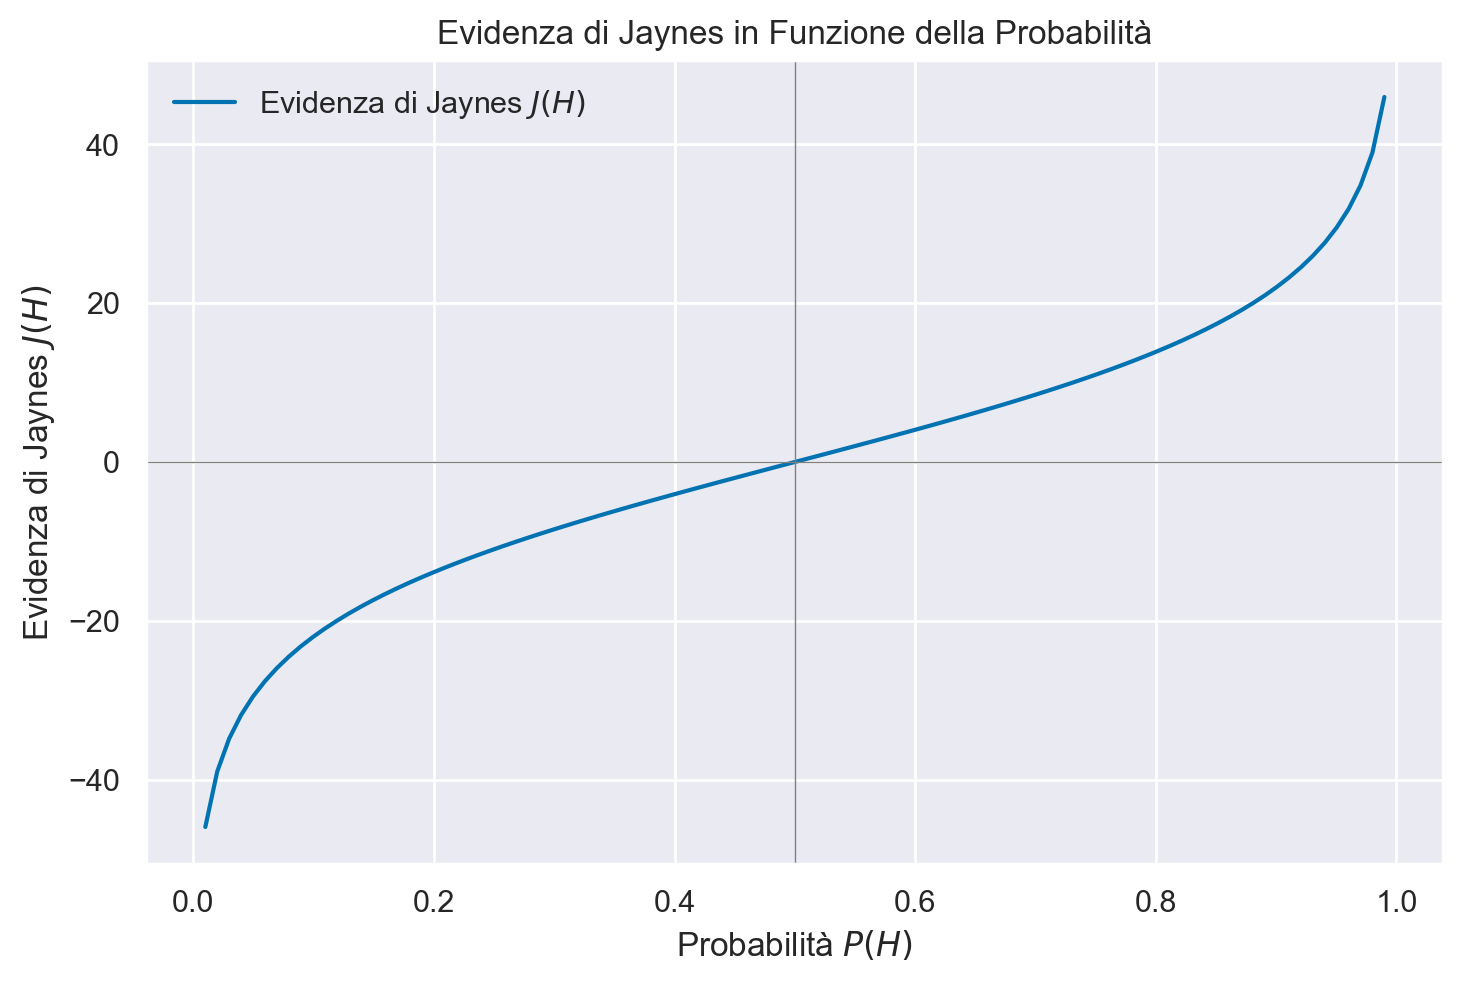

In [21]:
# Valori di probabilità da 0 a 1
probabilities = np.linspace(0.01, 0.99, 100)

# Calcolo delle log-odds
log_odds = np.log(probabilities / (1 - probabilities))

# Calcolo dell'evidenza di Jaynes J(H)
# Assumiamo un fattore di 10 per scalare il logaritmo, come nel formalismo di Jaynes
evidence_jaynes = 10 * log_odds

# Creazione del grafico
plt.plot(probabilities, evidence_jaynes, label='Evidenza di Jaynes $J(H)$')
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0.5, color='gray', lw=0.5)
plt.xlabel('Probabilità $P(H)$')
plt.ylabel('Evidenza di Jaynes $J(H)$')
plt.title('Evidenza di Jaynes in Funzione della Probabilità')
plt.legend()
plt.show()


L'equazione di Jaynes ha alcune proprietà matematiche che la rendono particolarmente interessante per l'aggiornamento sequenziale delle credenze o delle evidenze. Ecco una spiegazione più dettagliata della linearità e della facilità di aggiornamento in questa forma.

Nella forma logaritmica del Teorema di Bayes:

$$
\log \left( \text{Odds}(H | D) \right) = \log \left( \text{Odds}(H) \right) + 10 \log \left( \frac{P(D | H)}{P(D | \neg H)} \right)
$$

notiamo che l'aggiornamento delle credenze (o delle evidenze, se utilizziamo la notazione di Jaynes) avviene in maniera lineare. Questo è un vantaggio significativo perché la linearità semplifica notevolmente il calcolo quando si ha a che fare con una serie di evidenze o dati.

Supponiamo di avere una serie di dati indipendenti $ D_1, D_2, \ldots, D_n $. In un modello Bayesiano, potremmo voler aggiornare le nostre credenze in modo sequenziale ogni volta che osserviamo un nuovo dato. Nella forma logaritmica, l'aggiornamento diventa semplicemente una somma di termini logaritmici:

$$
\log \left( \text{Odds}(H | D_1, D_2, \ldots, D_n) \right) = \log \left( \text{Odds}(H) \right) + \sum_{i=1}^{n} 10 \log \left( \frac{P(D_i | H)}{P(D_i | \neg H)} \right).
$$

Questa forma è "modulare", nel senso che ogni nuovo pezzo di evidenza contribuisce con un termine additivo al logaritmo degli odds a posteriori. Questo significa che non è necessario ricominciare da capo ogni volta che si ottiene un nuovo dato; è sufficiente aggiungere (o sottrarre, se l'evidenza è contraria all'ipotesi) il nuovo termine al totale esistente.

Nella notazione di Jaynes, il termine $ 10 \log \left( \frac{P(D | H)}{P(D | \neg H)} \right) $ rappresenta un "quantitativo di evidenza" a favore di $ H $ rispetto a $ \neg H $ fornito dal dato $ D $. Maggiore è questo valore (in unità di decibel, se si utilizza il fattore 10), più il dato è informativo a favore dell'ipotesi $ H $.

In sintesi, la forma logaritmica del Teorema di Bayes offre un modo lineare e modulare di aggiornare le credenze o le evidenze, rendendola particolarmente utile in applicazioni pratiche come il machine learning, la diagnosi medica e la psicologia sperimentale.

### Esempio Numerico: Diagnosi di Disturbo d'Ansia Sociale (DAS)

Supponiamo di essere un psicologo che utilizza un questionario per diagnosticare il Disturbo d'Ansia Sociale (DAS) in un campione di individui. Vogliamo utilizzare il Teorema di Bayes nella sua forma logaritmica per aggiornare le nostre credenze sulla presenza del DAS in un particolare individuo, basandoci su una serie di domande del questionario.

#### Informazioni Iniziali

- **Probabilità a priori di DAS**: Supponiamo che la probabilità a priori che un individuo selezionato a caso abbia il DAS sia del 10%. Gli odds a priori saranno quindi $ \frac{0.1}{0.9} \approx 0.1111 $.
- **Domande del Questionario**: Utilizziamo un questionario con tre domande rilevanti (D1, D2, D3), ognuna delle quali ha una probabilità di risposta "sì" data da $ P(D_i \mid \text{DAS}) $ e $ P(D_i | \neg \text{DAS}) $.

| Domanda  | $ P(D_i \mid \text{DAS}) $ | $ P(D_i \mid \neg \text{DAS}) $ |
|----------|-----------------------------|--------------------------------|
| D1       | 0.9                         | 0.2                            |
| D2       | 0.8                         | 0.3                            |
| D3       | 0.85                        | 0.25                           |


#### Calcolo degli Odds a Posteriori

Per calcolare gli odds a posteriori utilizzando la formula logaritmica, utilizziamo:

$$
\log \left( \text{Odds}(\text{DAS} \mid D_1, D_2, D_3) \right) = \log \left( \text{Odds}(\text{DAS}) \right) + 10 \log \left( \frac{P(D_1 \mid \text{DAS})}{P(D_1 \mid \neg \text{DAS})} \right) + 10 \log \left( \frac{P(D_2 \mid \text{DAS})}{P(D_2 \mid \neg \text{DAS})} \right) + 10 \log \left( \frac{P(D_3 \mid \text{DAS})}{P(D_3 \mid \neg \text{DAS})} \right)
$$

Calcoliamo.

Dopo aver effettuato i calcoli, otteniamo i seguenti risultati:

- Termine logaritmico per la domanda D1: $6.53$
- Termine logaritmico per la domanda D2: $4.26$
- Termine logaritmico per la domanda D3: $5.31$

La somma di questi termini logaritmici, sommata al logaritmo degli odds a priori ($ \log_{10}(0.1111) \approx -0.96 $), ci dà un log-odds a posteriori di $ 15.15 $.

Convertendo questo valore dalla forma logaritmica alla forma originale, otteniamo odds a posteriori di circa $ 1.42 \times 10^{15} $.

Infine, convertiamo gli odds a posteriori in probabilità a posteriori, che risultano essere praticamente $ 1 $ (o $ 100\% $).

### Interpretazione

In questo esempio, l'elevata probabilità a posteriori suggerisce fortemente che l'individuo in questione è affetto da DAS, date le risposte al questionario.

Ogni termine logaritmico aggiunto alla somma rappresenta un "quantitativo di evidenza" a favore della diagnosi di DAS. Ad esempio, il termine $ 6.53 $ per la domanda D1 indica che questa domanda è molto informativa nel sostenere l'ipotesi di DAS.

Inoltre, l'aggiornamento modulare degli odds in forma logaritmica ci ha permesso di incorporare facilmente nuove informazioni senza dover ricalcolare l'intera equazione.

Questo esempio illustra come la forma logaritmica del Teorema di Bayes possa essere utilizzata in un contesto psicologico per la diagnosi di disturbi mentali, facilitando l'aggiornamento sequenziale delle credenze in modo lineare e modulare.

## Commenti e considerazioni finali

La riflessione epistemologica contemporanea ha ribadito che la conoscenza non può essere vista come una certezza inconfutabile o una garanzia razionale di verità. Invece, essa emerge come una serie di decisioni prese all'interno di un contesto di incertezza. Questa comprensione è particolarmente pertinente nel campo della ricerca scientifica, dove né la logica deduttiva né le rigorose dimostrazioni matematiche sono sufficienti. Di conseguenza, la scienza necessita di una "logica dell'incertezza," che è efficacemente fornita dalla teoria delle probabilità, e più specificamente, dal teorema di Bayes.

Il teorema di Bayes ci offre un framework per interpretare la probabilità come una valutazione soggettiva influenzata da diversi fattori condizionanti. In pratica, il teorema esprime la probabilità a posteriori $ P(H_i \mid E) $ come un risultato derivato dalla combinazione della probabilità a priori $ P(H_i) $ e della verosimiglianza $ P(E \mid H_i) $. Questa formulazione sottolinea che la nostra valutazione probabilistica di una data ipotesi $ H_i $ è modulata sia dall'evidenza empirica $ E $ che dalle nostre credenze a priori $ P(H_i) $.

Poiché la probabilità è una valutazione intrinsecamente soggettiva, è possibile che diversi osservatori arrivino a conclusioni differenti. Tuttavia, il teorema di Bayes fornisce un meccanismo razionale—conosciuto come "aggiornamento bayesiano"—per ricalibrare queste credenze in risposta a nuove informazioni o evidenze.

L'approccio bayesiano offre strumenti per valutare l'efficacia di diverse strategie di trattamento o interventi in psicologia clinica. Per esempio, se si afferma che la meditazione mattutina è efficace nel trattamento della depressione, è essenziale valutare questa affermazione nel contesto di tutte le evidenze disponibili, compresi i casi in cui la meditazione non ha portato a miglioramenti.

In sintesi, la metodologia bayesiana fornisce una cornice robusta per l'aggiornamento delle probabilità in presenza di nuove informazioni, offrendo spunti importanti sia per la ricerca che per la pratica clinica in psicologia.

Nel contesto di questo capitolo, abbiamo focalizzato la nostra discussione sul teorema di Bayes nel caso delle variabili casuali discrete. Tuttavia, nel prossimo capitolo, esploreremo come il teorema può essere applicato in modo più intuitivo alle variabili casuali continue. Per ulteriori dettagli, si rimanda al notebook {ref}`bayes-workflow-notebook`.

## Watermark

In [22]:
%load_ext watermark
%watermark -n -u -v -iv -w 

Last updated: Mon Jan 22 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

matplotlib: 3.8.2
pandas    : 2.1.4
arviz     : 0.17.0
numpy     : 1.26.2
seaborn   : 0.13.0

Watermark: 2.4.3

